In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#1.a.load data
df = pd.read_csv('kc_house_price.txt')

In [3]:
# #1.b)selected features

# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), cmap="RdBu")
# plt.title("Correlations Between Variables", size=15)
# plt.show()


In [3]:
# important_num_cols = list(set(df.corr()["price"][(df.corr()["price"]>0.50) | (df.corr()["price"]<-0.50)].index)) #selected_features
important_cols = ['sqft_living', 'bedrooms', 'price']
df = df[important_cols]
df = df.loc[:, ~df.columns.duplicated()]
df


,sqft_living,bedrooms,price
0,1180,3,221900.0
1,2570,3,538000.0
2,770,2,180000.0
3,1960,4,604000.0
4,1680,3,510000.0
...,...,...,...
21592,1530,3,360000.0
21593,2310,4,400000.0
21594,1020,2,402101.0
21595,1600,3,400000.0


In [4]:
#check data NAs
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())
# do not have NAs

Missing Values by Column
------------------------------
sqft_living    0
bedrooms       0
price          0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [5]:
X = df.drop("price", axis=1)
y = df["price"]

In [7]:
# #scale data
# from sklearn.preprocessing import StandardScaler

# # important_cols.remove("price")
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [21]:
#1.d.split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#2. Summarize and visualize the dataset
# a. Explore the dimensions of data
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (21597, 3)


In [8]:
# b. Show some instances from the data
df.head()

,sqft_living,bedrooms,price
0,1180,3,221900.0
1,2570,3,538000.0
2,770,2,180000.0
3,1960,4,604000.0
4,1680,3,510000.0


In [9]:
# c. Do Statistical summary of all attributes
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sqft_living,21597.0,2080.321850,918.106125,370.0,1430.0,1910.0,2550.0,13540.0
bedrooms,21597.0,3.373200,0.926299,1.0,3.0,3.0,4.0,33.0
price,21597.0,540296.573506,367368.140101,78000.0,322000.0,450000.0,645000.0,7700000.0


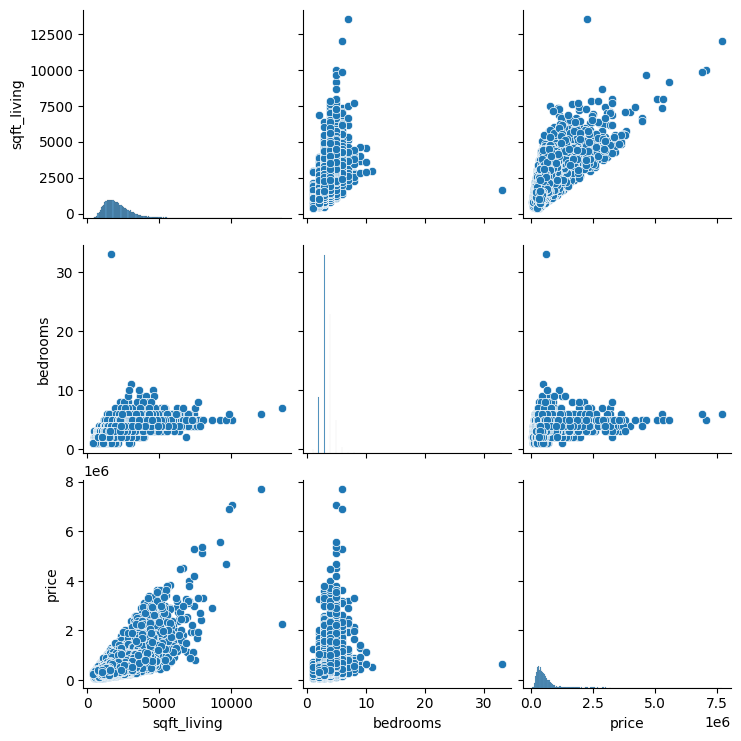

In [11]:
#plot
sns.pairplot(df)

In [12]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [13]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 167918.8303869316
MSE: 65223239474.9909
RMSE: 255388.40904589015
R2 Score: 0.5081146752267023
------------------------------
RMSE Cross-Validation: 258076.500771089


C:\Users\admin\AppData\Local\Temp\ipykernel_3196\1652442400.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [27]:
sq = float(input('Enter sqft_living: '))
bed = float(input('Enter the number of bedrooms: '))
# inx = scaler.transform([[sq, bed]])

output = lin_reg.predict([[sq,bed]])
print(f'The price: {output}')

The price: [537092.53743534]


c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[   315.49982738 -59886.08986162]
85751.1522667692
